# Libraries 

In [1]:
# Data processing
import pandas as pd
from pandas import DataFrame

# linear algebra
import numpy as np

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read dataset  from excel workbook

In [2]:
'''Read a csv file '''
Game_data = pd.read_excel("C:/Users/Leo/Survey_Result_Dataset.xlsx")
type(Game_data)

pandas.core.frame.DataFrame

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Exploration

In [4]:
'''View the first 5 rows of dataframe'''
Game_data.head()

,Timestamp,Gender,Age,Marital Status,Occupation,Education,Family Status,Gaming Experience,Mode of Game Play,Time(Weekday>),Time(Weekend),Total_time,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,2021/02/15 12:08:44 am EET,Male,30-45,No,Employed Full-Time,Bachelor's Degree,None,2 to 5 years,Play with group,11 hr,11 hr,22.0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
1,2021/02/16 9:30:21 pm EET,Male,18-30,Living Together,Employed Full-Time,High School,None,10 years and above,Play with group,2 hr,3 hr,5.0,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4,0
2,2021/02/16 10:43:33 pm EET,Male,30-45,Yes,Employed Full-Time,Master's Degree,1,2 to 5 years,Play with group,3 hr,5 hr,8.0,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4,0
3,2021/02/16 11:35:10 pm EET,Male,30-45,Yes,Employed Full-Time,Master's Degree,None,10 years and above,Play with group,4 hr,6 hr,10.0,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
4,2021/02/16 11:35:18 pm EET,Male,30-45,Yes,Employed Full-Time,Master's Degree,None,10 years and above,Play with group,4 hr,6 hr,10.0,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0


In [5]:
'''View the dimension of the dataframe'''
Game_data.shape

(82, 43)

In [6]:
'''View the features and their datatypes, number of observations in each feature and check for null values'''
Game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 43 columns):
Timestamp            82 non-null object
Gender               82 non-null object
Age                  82 non-null object
Marital Status       82 non-null object
Occupation           82 non-null object
Education            82 non-null object
Family Status        82 non-null object
Gaming Experience    82 non-null object
Mode of Game Play    82 non-null object
Time(Weekday>)       82 non-null object
Time(Weekend)        82 non-null object
Total_time           82 non-null float64
ABA_1                82 non-null int64
FP_1                 82 non-null int64
ABA_2                82 non-null int64
FP_2                 82 non-null int64
FP_3                 82 non-null int64
ABA_3                82 non-null int64
FP_4                 82 non-null int64
FP_5                 82 non-null int64
FP_6                 82 non-null int64
ABA_4                82 non-null int64
Conflict_1           82 no

In [7]:
''' View the mean and standard deviation of quantitative features'''
Game_data.describe()

,Total_time,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,8.042683,3.719512,3.963415,3.792683,3.829268,3.804878,3.621951,3.573171,3.792683,3.682927,2.829268,2.658537,2.548780,2.317073,2.158537,2.378049,2.256098,2.536585,1.621951,3.146341,1.914634,1.963415,1.792683,1.865854,2.609756,2.280488,2.426829,2.121951,2.719512,2.134146,3.329268,0.719512
std,5.350205,1.103019,0.961546,1.349328,1.331525,1.126987,1.038045,1.165666,1.039204,1.164050,1.303413,1.044911,1.145603,1.236064,0.961859,1.172106,1.141917,1.288076,0.897737,1.177169,1.135306,0.999322,1.085685,1.062982,1.015389,0.984753,1.133448,1.169470,1.146916,1.051304,1.066376,0.933259
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.250000,3.000000,3.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.500000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.500000,2.000000,3.000000,2.000000,3.000000,0.000000
75%,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000
max,23.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


# Visualization - Demography
## Gender

We had more male participants than female. Very few participants preferred not to disclose their gender


C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


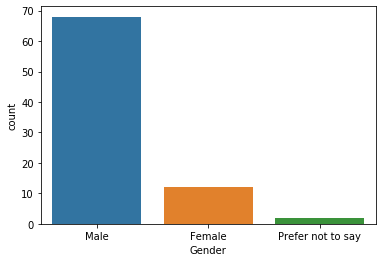

In [8]:
'''Visualize the number of observations by Gender'''
sns.countplot(Game_data["Gender"], label = 'count')
print('We had more male participants than female. Very few participants preferred not to disclose their gender')

## Age

Most of the players fall within the range of 30-45 years age group. 


C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


30-45                   42
18-30                   36
Prefer not to Answer     2
0-17                     2
Name: Age, dtype: int64

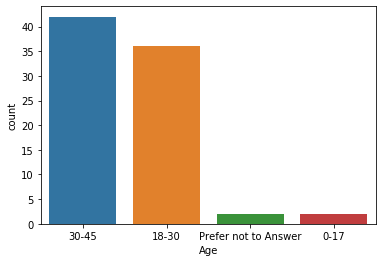

In [9]:
'''Visualize the number of observations based on Age'''
sns.countplot(Game_data["Age"], label = 'count')
print('Most of the players fall within the range of 30-45 years age group. ')
Game_data.Age.value_counts()

## Marital status

C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Most of the players are single followed by married people. 


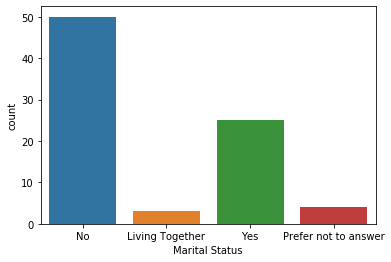

In [10]:
'''Visualize the number of observations based on Marital status'''
sns.countplot(Game_data["Marital Status"], label = 'count')
print('Most of the players are single followed by married people. ')

## Occupation

Most of the players are full-time employees followed by students. 


C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

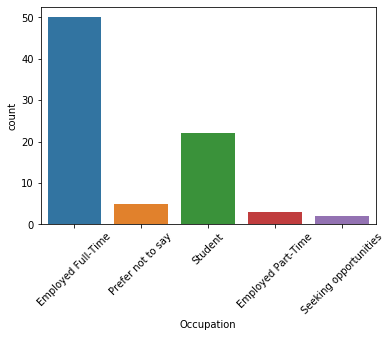

In [11]:
'''Visualize the number of observations based on Occupation'''

sns.countplot(Game_data["Occupation"], label = 'count')
print('Most of the players are full-time employees followed by students. ')
plt.xticks(rotation=45)

## Number of chlidren

C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Players with no children participated most, followed by players who have between 2 to 4 children. 


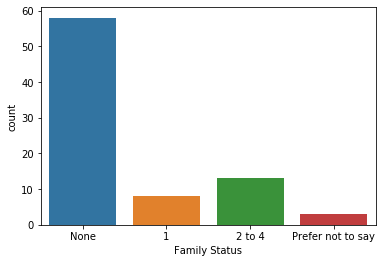

In [12]:
'''Visualize the number of observations based on Number of chlidren'''

sns.countplot(Game_data["Family Status"], label = 'count')
print('Players with no children participated most, followed by players who have between 2 to 4 children. ')

## Experience - number of years a player has been playing video games

Majority of the players have played video games for at least ten years.


C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

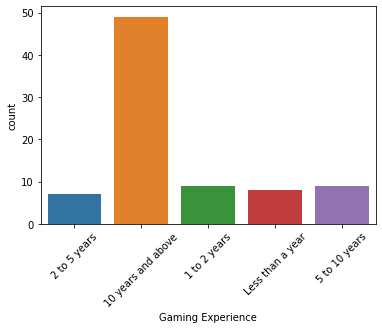

In [13]:
'''Visualize the number of observations by how long the individual has been playing video games'''

sns.countplot(Game_data["Gaming Experience"], label = 'count')
print('Majority of the players have played video games for at least ten years.')
plt.xticks(rotation=45)


C:\Users\Leo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Most of the players prefer to play in group followed by individuals who prefer to play alone.


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

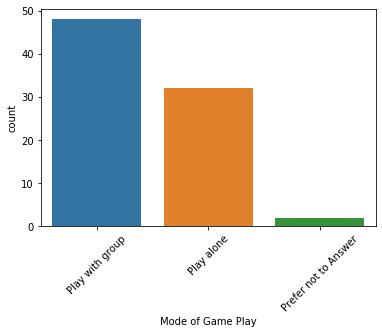

In [14]:
'''Visualize the number of observation based on Number of years the players played video game'''

sns.countplot(Game_data["Mode of Game Play"], label = 'count')
print('Most of the players prefer to play in group followed by individuals who prefer to play alone.')
plt.xticks(rotation=45)

# Preprocessing
## Encode


In [15]:
''' Convert Qualitative data into Quantitative data by encoding the values.'''
lblencoder_d = LabelEncoder()
Game_data.iloc[:,1] = lblencoder_d.fit_transform(Game_data.iloc[:,1].values)
Game_data.iloc[:,2] = lblencoder_d.fit_transform(Game_data.iloc[:,2].values)
Game_data.iloc[:,3] = lblencoder_d.fit_transform(Game_data.iloc[:,3].values)
Game_data.iloc[:,4] = lblencoder_d.fit_transform(Game_data.iloc[:,4].values)
Game_data.iloc[:,5] = lblencoder_d.fit_transform(Game_data.iloc[:,5].values)
Game_data.iloc[:,7] = lblencoder_d.fit_transform(Game_data.iloc[:,7].values)
Game_data.iloc[:,8] = lblencoder_d.fit_transform(Game_data.iloc[:,8].values)
Game_data.iloc[:,-1] = lblencoder_d.fit_transform(Game_data.iloc[:,-1].values)
Game_data['Family Status'] = Game_data['Family Status'].replace(['None','1','2to4','Prefer not to say'],['0','1','2','3'])

## Visualize the dataset after Encoding

In [16]:
Game_data

,Timestamp,Gender,Age,Marital Status,Occupation,Education,Family Status,Gaming Experience,Mode of Game Play,Time(Weekday>),Time(Weekend),Total_time,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,2021/02/15 12:08:44 am EET,1,2,1,0,0,0,2,1,11 hr,11 hr,22.0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
1,2021/02/16 9:30:21 pm EET,1,1,0,0,1,0,1,1,2 hr,3 hr,5.0,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4,0
2,2021/02/16 10:43:33 pm EET,1,2,3,0,2,1,2,1,3 hr,5 hr,8.0,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4,0
3,2021/02/16 11:35:10 pm EET,1,2,3,0,2,0,1,1,4 hr,6 hr,10.0,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
4,2021/02/16 11:35:18 pm EET,1,2,3,0,2,0,1,1,4 hr,6 hr,10.0,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
5,2021/02/17 8:16:13 am EET,1,2,1,0,0,0,1,1,9 hr,9 hr,18.0,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5,1
6,2021/02/17 8:38:19 am EET,1,2,3,0,2,2 to 4,1,0,Less than 1 hr,2 hr,2.5,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,2
7,2021/02/17 11:33:48 am EET,1,2,3,0,2,2 to 4,1,0,8 hr,8 hr,16.0,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1
8,2021/02/17 1:39:18 pm EET,0,2,1,0,0,0,0,1,Less than 1 hr,Less than 1 hr,1.0,1,1,3,3,3,3,2,3,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3,0
9,2021/02/17 1:48:42 pm EET,1,2,1,0,4,0,1,0,2 hr,5 hr,7.0,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3,0


In [17]:
''' Aggregating the observation based on the classes '''
Game_data.Class.value_counts()

0    50
2    27
1     5
Name: Class, dtype: int64

# Extract Important Features

## Drop the rows for players below 18 years old

In [18]:
''' Drop the rows who ever are below 18 years old '''
Game_data = Game_data[Game_data['Age']>0]

In [19]:
 print(Game_data.shape)
print('Two oservations were dropped')

(80, 43)
Two oservations were dropped


# Exclude the features for Demograpy and Gaming experience from the original dataset

In [20]:
'''Fetching features from 12 to 43'''
final_Data=Game_data.iloc[:,12:43]

In [21]:
final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 80
Data columns (total 31 columns):
ABA_1                80 non-null int64
FP_1                 80 non-null int64
ABA_2                80 non-null int64
FP_2                 80 non-null int64
FP_3                 80 non-null int64
ABA_3                80 non-null int64
FP_4                 80 non-null int64
FP_5                 80 non-null int64
FP_6                 80 non-null int64
ABA_4                80 non-null int64
Conflict_1           80 non-null int64
Conflict_2           80 non-null int64
Salience_1           80 non-null int64
Salience_2           80 non-null int64
Salience_3           80 non-null int64
Conflict_3           80 non-null int64
Conflict_4           80 non-null int64
Withdrawal           80 non-null int64
Tolerance_1          80 non-null int64
Conflict_5           80 non-null int64
Conflict_6           80 non-null int64
Conflict_7           80 non-null int64
Conflict_8           80 non-null int64


## Visualize the dataset after removing demographic and gaming experience features

In [22]:
''' Dimension of the dataframe after extracting features'''
final_Data.shape

(80, 31)

In [23]:
final_Data

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
1,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4,0
2,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4,0
3,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
4,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
5,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5,1
6,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,2
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1
8,1,1,3,3,3,3,2,3,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3,0
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3,0


# Correlation

In [24]:
'''Extracting only independent variables'''
corr_final_data = final_Data.iloc[:,0:30]

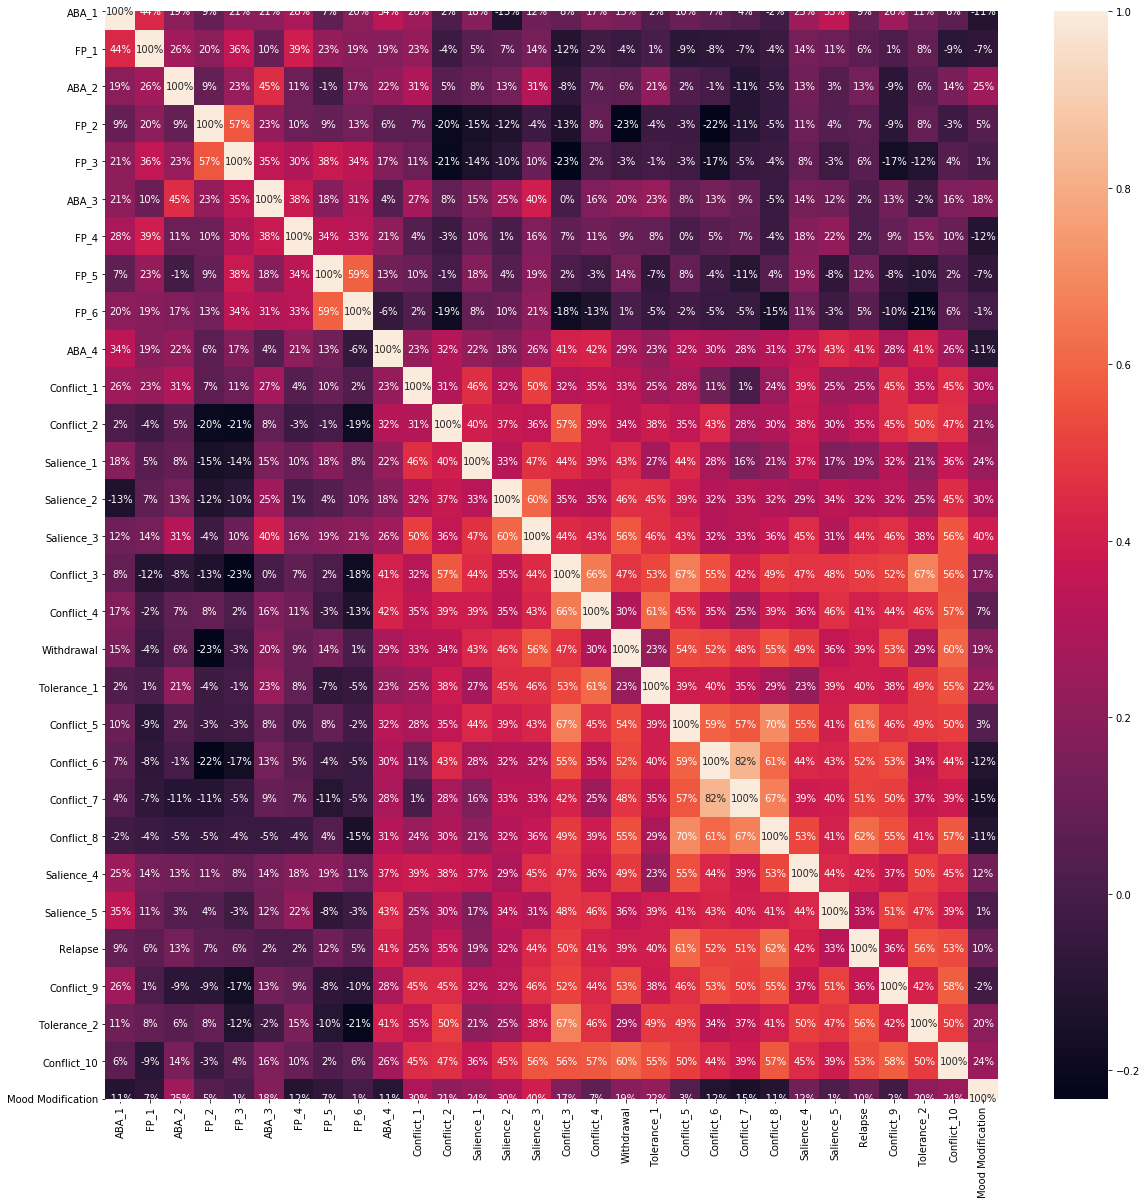

In [25]:
'''Heat map to know the correlation among features'''
plt.figure(figsize=(20,20))
sns.heatmap(corr_final_data.corr(), annot = True,fmt = '.0%') 

# Imbalance in dataset

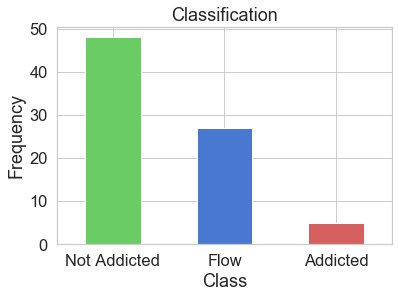

In [26]:
'''Visualize the number of observations by class'''

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
LABEL_CLASSIFICATION = ["Not Addicted","Flow", "Addicted"]
count_classes = pd.value_counts(final_Data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color=['g', 'b', 'r'])
plt.title("Classification")
plt.xticks(range(3), LABEL_CLASSIFICATION)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [27]:
'''Count of number of observatios in each class'''
print(final_Data.iloc[:,-1].value_counts())
print('2----> Flow')
print('1----> Addicted')
print('0----> Non Addicted')

0    48
2    27
1     5
Name: Class, dtype: int64
2----> Flow
1----> Addicted
0----> Non Addicted


In [28]:
''' Rearrange the observations in decending order based on Target (class) '''
final_Data.sort_values(by='Class', ascending=False, inplace=True)

In [29]:
'''View the dataframe'''
final_Data

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
24,3,5,4,5,5,4,5,4,3,2,3,4,1,2,3,2,3,1,4,1,1,1,1,2,2,3,3,3,3,4,2
30,4,5,5,5,5,4,4,5,5,5,4,2,5,3,5,4,2,2,3,4,1,1,2,3,4,3,2,4,2,5,2
33,4,4,5,5,5,5,5,5,4,4,3,4,1,3,3,3,3,1,5,3,1,1,1,3,2,2,3,3,2,4,2
35,2,4,5,4,4,5,5,5,5,1,3,1,2,3,4,2,3,2,3,1,1,1,2,3,1,2,1,2,2,5,2
49,4,4,5,2,3,5,5,5,5,4,5,3,5,3,5,2,3,4,4,1,1,1,1,3,2,3,4,3,4,5,2
50,4,5,1,5,5,4,5,5,5,1,3,3,1,1,1,2,1,1,1,1,1,1,1,3,1,2,1,4,1,3,2
51,4,4,5,4,4,4,4,4,5,5,3,3,3,3,3,3,4,3,3,3,3,2,3,4,3,3,3,3,3,4,2
54,5,5,5,5,5,5,5,4,5,5,4,3,3,3,4,2,5,1,4,1,1,1,1,2,3,3,1,3,2,3,2
56,5,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2


# Balanced Dataset

In [30]:
''' In order to balance the dataset, extract the rows from 22 to 37 to get 5 observations in each class'''
Balanced_data = final_Data.iloc[22:37, :]

In [31]:
''' view the dataframe with balanced dataset'''
Balanced_data

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
6,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,2
19,4,5,2,5,5,4,4,5,5,4,3,3,3,3,3,2,3,1,3,1,3,3,1,4,2,3,1,3,1,3,2
12,4,4,5,4,4,5,5,4,4,1,3,2,2,2,3,2,2,2,2,1,2,1,1,3,2,2,2,1,2,4,2
16,5,4,3,4,4,4,5,4,5,4,3,1,2,2,2,2,2,1,3,1,1,1,2,3,3,3,2,4,3,4,2
17,5,5,5,5,5,4,4,4,4,4,3,2,2,3,2,2,5,1,3,2,1,1,1,4,3,3,2,3,2,3,2
31,4,4,5,5,5,5,4,5,5,5,4,5,4,4,5,5,3,4,4,4,5,5,4,5,3,5,4,4,4,5,1
64,4,1,1,5,5,5,3,5,1,5,3,4,3,4,4,5,5,4,5,5,3,3,4,4,4,4,3,4,4,4,1
5,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5,1
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1
23,1,5,1,2,1,2,4,3,1,3,2,4,3,5,3,5,5,2,5,4,3,3,4,3,2,4,3,5,3,3,1


## Shuffle the balanced dataset

In [32]:
''' Shuffle the balanced dataset to avoid a cluster of one class'''
shuffle_df_new = shuffle(Balanced_data)
shuffle_df_new

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
62,5,5,2,5,5,1,5,2,3,5,1,2,1,1,1,2,3,1,3,1,1,1,1,3,3,1,1,3,2,1,0
65,3,3,4,3,3,2,3,4,4,2,3,1,3,1,1,2,3,2,3,3,2,1,3,2,2,3,1,1,3,3,0
16,5,4,3,4,4,4,5,4,5,4,3,1,2,2,2,2,2,1,3,1,1,1,2,3,3,3,2,4,3,4,2
59,4,4,3,2,2,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,0
64,4,1,1,5,5,5,3,5,1,5,3,4,3,4,4,5,5,4,5,5,3,3,4,4,4,4,3,4,4,4,1
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3,0
23,1,5,1,2,1,2,4,3,1,3,2,4,3,5,3,5,5,2,5,4,3,3,4,3,2,4,3,5,3,3,1
12,4,4,5,4,4,5,5,4,4,1,3,2,2,2,3,2,2,2,2,1,2,1,1,3,2,2,2,1,2,4,2
31,4,4,5,5,5,5,4,5,5,5,4,5,4,4,5,5,3,4,4,4,5,5,4,5,3,5,4,4,4,5,1


Now the dataset is balanced with 5 opbservations in each class


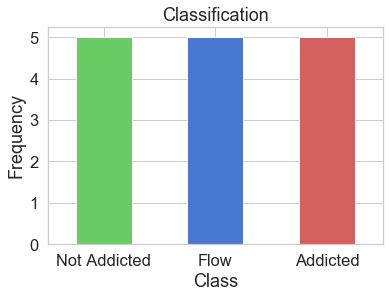

In [33]:
''' Visualize the balanced dataset '''
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
LABEL_CLASSIFICATION = ["Not Addicted","Flow", "Addicted"]
count_classes = pd.value_counts(shuffle_df_new['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color=['g', 'b', 'r'])
plt.title("Classification")
plt.xticks(range(3), LABEL_CLASSIFICATION)
plt.xlabel("Class")
plt.ylabel("Frequency")

print('Now the dataset is balanced with 5 opbservations in each class')

In [34]:
'''Check the dimension of the balanced dataset'''
shuffle_df_new.shape

(15, 31)

In [35]:
'''Count of observations in each class (target)'''
shuffle_df_new.iloc[:,-1].value_counts()

2    5
1    5
0    5
Name: Class, dtype: int64

## Split the Balanced data set into independent(predictors) and dependent (target) to train

In [36]:
'''X is independent variables and Y is the dependent variable'''
X = shuffle_df_new.drop(["Class"], axis = 1)
Y = shuffle_df_new.iloc[:,-1]

In [37]:
'''view the independent variables'''
X

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification
62,5,5,2,5,5,1,5,2,3,5,1,2,1,1,1,2,3,1,3,1,1,1,1,3,3,1,1,3,2,1
65,3,3,4,3,3,2,3,4,4,2,3,1,3,1,1,2,3,2,3,3,2,1,3,2,2,3,1,1,3,3
16,5,4,3,4,4,4,5,4,5,4,3,1,2,2,2,2,2,1,3,1,1,1,2,3,3,3,2,4,3,4
59,4,4,3,2,2,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
64,4,1,1,5,5,5,3,5,1,5,3,4,3,4,4,5,5,4,5,5,3,3,4,4,4,4,3,4,4,4
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3
23,1,5,1,2,1,2,4,3,1,3,2,4,3,5,3,5,5,2,5,4,3,3,4,3,2,4,3,5,3,3
12,4,4,5,4,4,5,5,4,4,1,3,2,2,2,3,2,2,2,2,1,2,1,1,3,2,2,2,1,2,4
31,4,4,5,5,5,5,4,5,5,5,4,5,4,4,5,5,3,4,4,4,5,5,4,5,3,5,4,4,4,5


In [38]:
'''view the dependent variables'''
Y

62    0
65    0
16    2
59    0
64    1
7     1
9     0
23    1
12    2
31    1
5     1
19    2
17    2
61    0
6     2
Name: Class, dtype: int64

# Split the Unbalanced dataset(Original data) set into independent(predictors) and dependent (target) for testing

In [39]:
'''For testing purpose, the unbalnced dataset have been used to predict. Dimestion of unbalnce dataset'''
final_Data.shape

(80, 31)

In [40]:
'''View unbalanced dataframe'''
final_Data

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
24,3,5,4,5,5,4,5,4,3,2,3,4,1,2,3,2,3,1,4,1,1,1,1,2,2,3,3,3,3,4,2
30,4,5,5,5,5,4,4,5,5,5,4,2,5,3,5,4,2,2,3,4,1,1,2,3,4,3,2,4,2,5,2
33,4,4,5,5,5,5,5,5,4,4,3,4,1,3,3,3,3,1,5,3,1,1,1,3,2,2,3,3,2,4,2
35,2,4,5,4,4,5,5,5,5,1,3,1,2,3,4,2,3,2,3,1,1,1,2,3,1,2,1,2,2,5,2
49,4,4,5,2,3,5,5,5,5,4,5,3,5,3,5,2,3,4,4,1,1,1,1,3,2,3,4,3,4,5,2
50,4,5,1,5,5,4,5,5,5,1,3,3,1,1,1,2,1,1,1,1,1,1,1,3,1,2,1,4,1,3,2
51,4,4,5,4,4,4,4,4,5,5,3,3,3,3,3,3,4,3,3,3,3,2,3,4,3,3,3,3,3,4,2
54,5,5,5,5,5,5,5,4,5,5,4,3,3,3,4,2,5,1,4,1,1,1,1,2,3,3,1,3,2,3,2
56,5,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2


In [41]:
'''Unbalanced dataset was in cluster based on class. In order to avoid the cluster, 
the dataset is sorted in asecending order based on index number below '''
final_Data_index_ased = final_Data.sort_index()
final_Data_index_ased = final_Data_index_ased.reset_index(drop=True)
final_Data_index_ased

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2
1,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4,0
2,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4,0
3,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
4,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0
5,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5,1
6,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,2
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1
8,1,1,3,3,3,3,2,3,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3,0
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3,0


In [42]:
'''Split the Unbalanced dataset into independent(predictors) and dependent (target) to test'''
All_x_test = final_Data_index_ased.iloc[:,0:30]
All_y_test = final_Data_index_ased.iloc[:,-1]

## Split the balanced dataset into Train and Test

In [43]:
'''70% of data is used for train purpose.'''
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.3,shuffle=False)

# Visualize the dimension of train and test data

In [44]:
print('dimension of X_train : ',X_train.shape)
print('dimension of X_test : ',X_test.shape)
print('dimension of Y_train : ',Y_train.shape)
print('dimension of Y_test : ',Y_test.shape)

dimension of X_train :  (10, 30)
dimension of X_test :  (5, 30)
dimension of Y_train :  (10,)
dimension of Y_test :  (5,)


In [45]:
'''View the training dataset with independent variable'''
X_train

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification
62,5,5,2,5,5,1,5,2,3,5,1,2,1,1,1,2,3,1,3,1,1,1,1,3,3,1,1,3,2,1
65,3,3,4,3,3,2,3,4,4,2,3,1,3,1,1,2,3,2,3,3,2,1,3,2,2,3,1,1,3,3
16,5,4,3,4,4,4,5,4,5,4,3,1,2,2,2,2,2,1,3,1,1,1,2,3,3,3,2,4,3,4
59,4,4,3,2,2,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
64,4,1,1,5,5,5,3,5,1,5,3,4,3,4,4,5,5,4,5,5,3,3,4,4,4,4,3,4,4,4
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3
23,1,5,1,2,1,2,4,3,1,3,2,4,3,5,3,5,5,2,5,4,3,3,4,3,2,4,3,5,3,3
12,4,4,5,4,4,5,5,4,4,1,3,2,2,2,3,2,2,2,2,1,2,1,1,3,2,2,2,1,2,4
31,4,4,5,5,5,5,4,5,5,5,4,5,4,4,5,5,3,4,4,4,5,5,4,5,3,5,4,4,4,5


In [46]:
'''View the count of dependent variable based on class'''
Y_train.value_counts()

1    4
0    4
2    2
Name: Class, dtype: int64

In [47]:
'''create a function for the models'''
def models(X_train, Y_train):
    list_accuracy =[]
    
     
    '''Model 1 --> Support Vector Classifier'''
    svc = SVC(gamma=0.025, C=3)
    svc.fit(X_train,Y_train)
    list_accuracy.append(svc.score(X_train, Y_train))
    
    '''Model 2 --> Decision Tree'''
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    list_accuracy.append(tree.score(X_train, Y_train))
             
     
    '''Model 3 --> K-Nearest Neighbour'''
    KNN = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
    KNN.fit(X_train, Y_train)
    list_accuracy.append(KNN.score(X_train, Y_train))
    
        
    '''Print the result of the models'''  
    print('1) DecisionTreeClaassifier Training Accuracy:', tree.score(X_train, Y_train))           
    print('2) kNeighbors Training Accuracy:', KNN.score(X_train, Y_train))
    print('3) Support Vector Machine Training Accuracy:', svc.score(X_train, Y_train)) 
    return tree,KNN, svc,list_accuracy

In [48]:
'''Pass the training data to the models above to get the accuracy for each model'''
model = models(X_train, Y_train)
model_names =['DecisionTreeClaassifier','kNeighbors Training','Support Vector Machine']

1) DecisionTreeClaassifier Training Accuracy: 1.0
2) kNeighbors Training Accuracy: 1.0
3) Support Vector Machine Training Accuracy: 1.0


In [49]:
'''Create three lists to append the predicted values for each algorithms'''
Decision_list = []
svc_list = []
kneigh_list = []

# Algorithms


In [50]:
'''View the unbalanced dataset with independent variable for testing'''
All_x_test

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2
1,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4
2,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4
3,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4
4,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4
5,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5
6,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1
8,1,1,3,3,3,3,2,3,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3


In [51]:
'''View the unbalanced dataset with dependent variable for testing'''
All_y_test

0     2
1     0
2     0
3     0
4     0
5     1
6     2
7     1
8     0
9     0
10    0
11    0
12    2
13    0
14    0
15    0
16    2
17    2
18    2
19    2
20    0
21    0
22    0
23    1
24    2
25    2
26    0
27    0
28    0
29    0
30    2
31    1
32    0
33    2
34    0
35    2
36    0
37    0
38    0
39    0
40    2
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    2
50    2
51    2
52    0
53    0
54    2
55    0
56    2
57    0
58    2
59    0
60    2
61    0
62    0
63    2
64    1
65    0
66    2
67    2
68    0
69    2
70    2
71    0
72    0
73    0
74    2
75    2
76    0
77    0
78    0
79    0
Name: Class, dtype: int64

# Testing 
## SVC

In [52]:
svc = SVC(kernel='rbf', C=1).fit(X_train, Y_train)
y_pred = svc.predict(All_x_test)
svc_list.append(y_pred)
confusion = confusion_matrix(All_y_test, y_pred)
print('SVC\n')
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(All_y_test, y_pred)))
                     
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(All_y_test, y_pred, target_names=['Not Addicted', 'Addicted', 'Flow']))

SVC

Confusion Matrix

[[47  1  0]
 [ 0  5  0]
 [20  3  4]]

Accuracy: 0.70


Classification Report

              precision    recall  f1-score   support

Not Addicted       0.70      0.98      0.82        48
    Addicted       0.56      1.00      0.71         5
        Flow       1.00      0.15      0.26        27

    accuracy                           0.70        80
   macro avg       0.75      0.71      0.60        80
weighted avg       0.79      0.70      0.62        80



C:\Users\Leo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
'''View the values for predicted output for better understanding'''
print(svc_list)
print("")
print(y_pred)

[array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)]

[0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 1 1 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0]


## Decision Tree

In [54]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
tree.fit(X_train, Y_train)
y_pred = tree.predict(All_x_test)
Decision_list.append(y_pred)

confusion = confusion_matrix(All_y_test, y_pred)
print('Decision Tree\n')
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(All_y_test, y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(All_y_test, y_pred, target_names=['Not Addicted', 'Addicted', 'Flow']))

Decision Tree

Confusion Matrix

[[27  2 19]
 [ 0  5  0]
 [ 2  0 25]]

Accuracy: 0.71


Classification Report

              precision    recall  f1-score   support

Not Addicted       0.93      0.56      0.70        48
    Addicted       0.71      1.00      0.83         5
        Flow       0.57      0.93      0.70        27

    accuracy                           0.71        80
   macro avg       0.74      0.83      0.75        80
weighted avg       0.80      0.71      0.71        80



## KNeighbors

In [55]:
KNN = KNeighborsClassifier(n_neighbors=2, p=2, weights='distance')
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(All_x_test)
kneigh_list.append(y_pred)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(All_y_test, y_pred)
print('KNeighbors\n')
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(All_y_test, y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(All_y_test, y_pred, target_names=['Not Addicted', 'Addicted', 'Flow']))

KNeighbors

Confusion Matrix

[[29  0 19]
 [ 0  5  0]
 [ 4  0 23]]

Accuracy: 0.71


Classification Report

              precision    recall  f1-score   support

Not Addicted       0.88      0.60      0.72        48
    Addicted       1.00      1.00      1.00         5
        Flow       0.55      0.85      0.67        27

    accuracy                           0.71        80
   macro avg       0.81      0.82      0.79        80
weighted avg       0.77      0.71      0.72        80



In [56]:
'''Convert the list of predicted output for each model into dataframe'''
svc_df = pd.DataFrame(svc_list)
kneigh_df = pd.DataFrame(kneigh_list)
DecisionTree_df = pd.DataFrame(Decision_list)


In [57]:
'''Inverse the dataframe to vertical form which was in horizontal form before'''
svc_df.T.shape
svc_df.T

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [58]:
'''Create new dataframe and assign the dataset which was used for testing'''
Compare_result = final_Data_index_ased

In [59]:
'''Dimenstion of new dataframe'''
Compare_result.shape

(80, 31)

In [60]:
'''Create  three new column to add predicted output retrived by each model'''
Compare_result['Predicted_SVC'] = svc_df.T
Compare_result['Predicted_KNeigh'] = kneigh_df.T
Compare_result['Predicted_DT'] = DecisionTree_df.T

In [61]:
'''View the dataframe with expected and predicted output for each model'''
Compare_result

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification,Class,Predicted_SVC,Predicted_KNeigh,Predicted_DT
0,5,5,5,3,4,3,4,5,4,3,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2,2,0,2,0
1,5,5,4,5,2,3,2,3,4,2,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4,0,0,2,0
2,4,4,5,5,4,5,2,2,3,1,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4,0,0,2,2
3,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0,0,2,2
4,1,3,5,5,5,5,1,3,5,1,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4,0,0,2,2
5,5,4,5,1,5,3,3,5,5,5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5,1,1,1,1
6,4,5,4,5,5,4,4,4,3,2,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,2,0,2,2
7,5,5,5,5,5,5,5,4,5,3,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1,1,1,1,1
8,1,1,3,3,3,3,2,3,3,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3,0,0,0,0
9,4,3,3,3,2,2,2,1,1,3,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3,0,0,0,0


# Checking for Internal Consistency and Reliability for FSS and PVGT scales

In [62]:
'''Extract only Flow components'''
Df_flow = All_x_test.iloc[:,0:10]

In [63]:
'''View the dataframe which has only flow components'''
Df_flow

,ABA_1,FP_1,ABA_2,FP_2,FP_3,ABA_3,FP_4,FP_5,FP_6,ABA_4
0,5,5,5,3,4,3,4,5,4,3
1,5,5,4,5,2,3,2,3,4,2
2,4,4,5,5,4,5,2,2,3,1
3,1,3,5,5,5,5,1,3,5,1
4,1,3,5,5,5,5,1,3,5,1
5,5,4,5,1,5,3,3,5,5,5
6,4,5,4,5,5,4,4,4,3,2
7,5,5,5,5,5,5,5,4,5,3
8,1,1,3,3,3,3,2,3,3,1
9,4,3,3,3,2,2,2,1,1,3


In [64]:
'''Extract only Addiction components'''
Df_addiction = All_x_test.iloc[:,10:30]

In [65]:
'''View the dataframe which has only addiction components'''
Df_addiction

,Conflict_1,Conflict_2,Salience_1,Salience_2,Salience_3,Conflict_3,Conflict_4,Withdrawal,Tolerance_1,Conflict_5,Conflict_6,Conflict_7,Conflict_8,Salience_4,Salience_5,Relapse,Conflict_9,Tolerance_2,Conflict_10,Mood Modification
0,3,2,1,2,3,1,3,1,5,1,1,1,3,2,2,3,2,3,3,2
1,4,3,3,3,4,2,2,1,2,1,1,1,1,3,3,1,3,3,1,4
2,3,3,2,2,2,1,2,2,3,2,2,2,2,4,2,1,1,2,2,4
3,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4
4,3,2,1,4,3,1,2,1,4,1,1,1,1,1,1,2,1,1,3,4
5,5,5,5,3,5,5,5,5,5,5,3,3,4,5,3,5,4,5,5,5
6,3,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2
7,3,4,2,2,3,4,5,2,5,5,4,4,5,4,4,5,5,5,5,1
8,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,3
9,3,5,3,2,1,4,5,2,5,1,3,2,2,2,3,2,4,3,3,3


In [66]:
'''Function for Flow to check internal consistency '''
def cronbach_alpha1(Df_flow):
    '''1. Transform the df into a correlation matrix'''
    df_corr = Df_flow.corr()
    
    '''2.1 Calculate N'''
    # The number of variables equals the number of columns in the df
    N = Df_flow.shape[1]
    
    '''2.2 Calculate R
    For this, we'll loop through the columns and append every
    relevant correlation to an array calles "r_s". Then, we'll
    calculate the mean of "r_s"'''
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
    '''3. Use the formula to calculate Cronbach's Alpha '''
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [67]:
'''Internal consistency for Flow'''
cronbach_alpha1(Df_flow)

0.7493835488144521

In [68]:
'''Function for Addiction to check internal consistency'''

def cronbach_alpha2(Df_addiction):
    '''1. Transform the df into a correlation matrix '''
    df_corr2 = Df_addiction.corr()
    
    '''2.1 Calculate N
    The number of variables equals the number of columns in the df '''
    N = Df_addiction.shape[1]
    
    ''' 2.2 Calculate R
     For this, we'll loop through the columns and append every
     relevant correlation to an array calles "r_s". Then, we'll
     calculate the mean of "r_s" '''
    rs = np.array([])
    for i, col in enumerate(df_corr2.columns):
        sum_ = df_corr2[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
     
    ''' 3.Use the formula to calculate Cronbach's Alpha '''
    cronbach_alpha2 = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha2

In [69]:
'''Internal consistency for Addiction'''
cronbach_alpha2(Df_addiction)

0.9276032519776879